In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

In [ ]:
import pandas as pd

# Path where dataset is stored
file_path = "/root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv"  # You can adjust if needed

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to confirm it's loaded correctly
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Separate features and target variable
X = df.drop(columns=['Class'])  # Features (excluding 'Class')
y = df['Class']  # Target variable ('Class')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the 'Amount' feature
scaler = StandardScaler()
X[['Amount']] = scaler.fit_transform(X[['Amount']])

# Optional: You may scale other features, but for simplicity, we’ll focus on 'Amount'

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print(f"Class distribution in training set after SMOTE: {y_train_resampled.value_counts()}")

Class distribution in training set after SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Get predicted probabilities (for AUPRC calculation)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class '1' (fraud)


In [ ]:
from sklearn.metrics import classification_report

# Print the classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you already have y_test and y_pred from your model
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Sensitivity (TPR)
specificity = TN / (TN + FP)  # True Negative Rate (TNR)
precision = precision_score(y_test, y_pred)  # Positive Predictive Value (PPV)
f1 = f1_score(y_test, y_pred)  # F1 Score

# Print confusion matrix for reference
print("Confusion Matrix:\n", cm)

# Arrange metrics exactly like Alexis’s table format
metrics_table = f"""
📌 **Random Forest Model Metrics (Aligned with Decision Tree Format)**

| **Metric**                   | **Value**   | **What It Means** |
|------------------------------|------------|-------------------|
| **Accuracy**                 | {accuracy:.4f} | Model is correct {accuracy*100:.2f}% of the time, but class imbalance can be misleading. |
| **Sensitivity (Recall, TPR)** | {recall:.4f} | Model catches {recall*100:.2f}% of fraud cases but misses {100-recall*100:.2f}%. |
| **Specificity (TNR)**         | {specificity:.4f} | Model correctly identifies {specificity*100:.2f}% of non-fraud transactions. |
| **Precision (PPV)**           | {precision:.4f} | Of flagged fraud cases, {precision*100:.2f}% are actual fraud. |
| **F1-Score**                  | {f1:.4f} | Balance between detecting fraud and avoiding false alarms. |
"""

# Print the formatted table
print(metrics_table)



Confusion Matrix:
 [[56847    17]
 [   17    81]]

📌 **Random Forest Model Metrics (Aligned with Decision Tree Format)**

| **Metric**                   | **Value**   | **What It Means** |
|------------------------------|------------|-------------------|
| **Accuracy**                 | 0.9994 | Model is correct 99.94% of the time, but class imbalance can be misleading. |
| **Sensitivity (Recall, TPR)** | 0.8265 | Model catches 82.65% of fraud cases but misses 17.35%. |
| **Specificity (TNR)**         | 0.9997 | Model correctly identifies 99.97% of non-fraud transactions. |
| **Precision (PPV)**           | 0.8265 | Of flagged fraud cases, 82.65% are actual fraud. |
| **F1-Score**                  | 0.8265 | Balance between detecting fraud and avoiding false alarms. |



In [ ]:
# Print formatted table in Markdown style
metrics_table = f"""
📌 **Random Forest Model Metrics (Aligned with Decision Tree Format)**

| **Metric**                   | **Value**   | **What It Means** |
|------------------------------|------------|-------------------|
| **Accuracy**                 | {accuracy:.4f} | Model is correct {accuracy*100:.2f}% of the time, but class imbalance can be misleading. |
| **Sensitivity (Recall, TPR)** | {recall:.4f} | Model catches {recall*100:.2f}% of fraud cases but misses {100-recall*100:.2f}%. |
| **Specificity (TNR)**         | {specificity:.4f} | Model correctly identifies {specificity*100:.2f}% of non-fraud transactions. |
| **Precision (PPV)**           | {precision:.4f} | Of flagged fraud cases, {precision*100:.2f}% are actual fraud. |
| **F1-Score**                  | {f1:.4f} | Balance between detecting fraud and avoiding false alarms. |
"""

print(metrics_table)



📌 **Random Forest Model Metrics (Aligned with Decision Tree Format)**

| **Metric**                   | **Value**   | **What It Means** |
|------------------------------|------------|-------------------|
| **Accuracy**                 | 0.9994 | Model is correct 99.94% of the time, but class imbalance can be misleading. |
| **Sensitivity (Recall, TPR)** | 0.8265 | Model catches 82.65% of fraud cases but misses 17.35%. |
| **Specificity (TNR)**         | 0.9997 | Model correctly identifies 99.97% of non-fraud transactions. |
| **Precision (PPV)**           | 0.8265 | Of flagged fraud cases, 82.65% are actual fraud. |
| **F1-Score**                  | 0.8265 | Balance between detecting fraud and avoiding false alarms. |



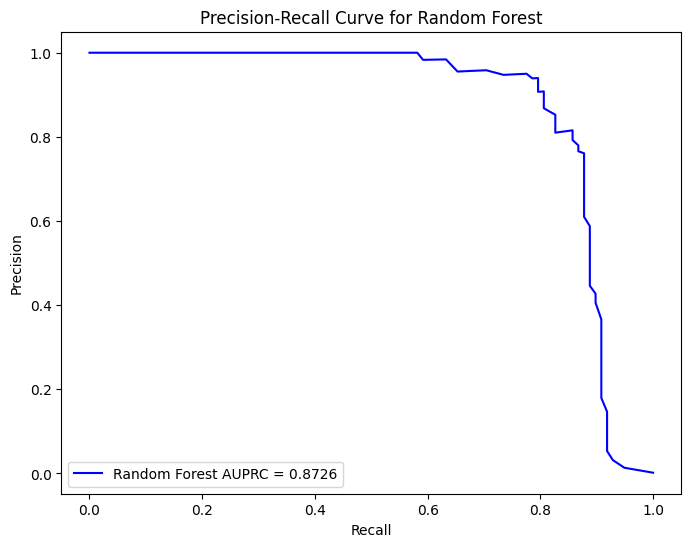

Random Forest AUPRC: 0.8726


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Plot Precision-Recall curve and calculate AUPRC
def plot_auprc(y_true, y_probs, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    auprc = auc(recall, precision)  # Area under Precision-Recall curve

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', label=f'{model_name} AUPRC = {auprc:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc='best')
    plt.show()

    return auprc

# Evaluate AUPRC
auprc_rf = plot_auprc(y_test, y_pred_prob, "Random Forest")
print(f"Random Forest AUPRC: {auprc_rf:.4f}")


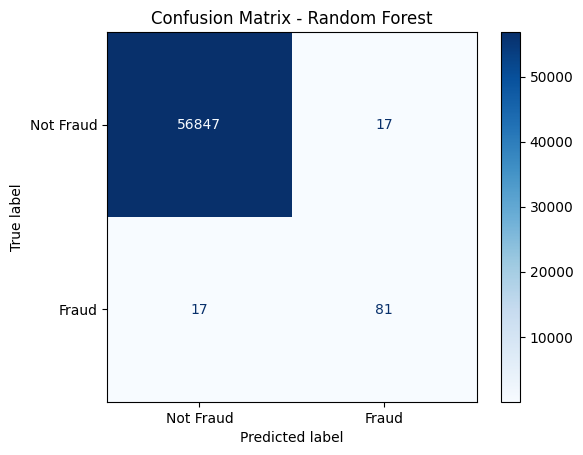

Confusion Matrix:
[[56847    17]
 [   17    81]]


In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(cm)



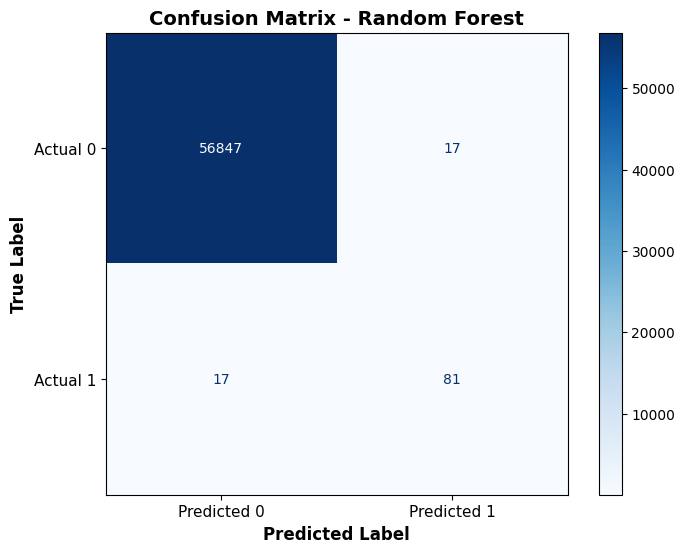

Confusion Matrix:
[[56847    17]
 [   17    81]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels to match Alexis's format
display_labels = ['Not Fraud', 'Fraud']

# Create the Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Plot the confusion matrix with modified labels
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')

# Manually set axis labels to match Alexis’s style
ax.set_xlabel("Predicted Label", fontsize=12, fontweight='bold')
ax.set_ylabel("True Label", fontsize=12, fontweight='bold')
ax.set_title("Confusion Matrix - Random Forest", fontsize=14, fontweight='bold')

# Adjust tick labels to match Alexis’s slide style
ax.set_xticklabels(["Predicted 0", "Predicted 1"], fontsize=11)
ax.set_yticklabels(["Actual 0", "Actual 1"], fontsize=11)

# Show the plot
plt.show()

# Print confusion matrix values for reference
print("Confusion Matrix:")
print(cm)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc(y_true, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs)  # Compute FPR and TPR
    auc_roc = auc(fpr, tpr)  # Compute AUC-ROC

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'{model_name} AUC-ROC = {auc_roc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='best')
    plt.show()

    return auc_roc

# Evaluate AUC-ROC for Random Forest
auc_roc_rf = plot_roc(y_test, y_pred_prob, "Random Forest")
print(f"Random Forest AUC-ROC: {auc_roc_rf:.4f}")


NameError: name 'y_test' is not defined

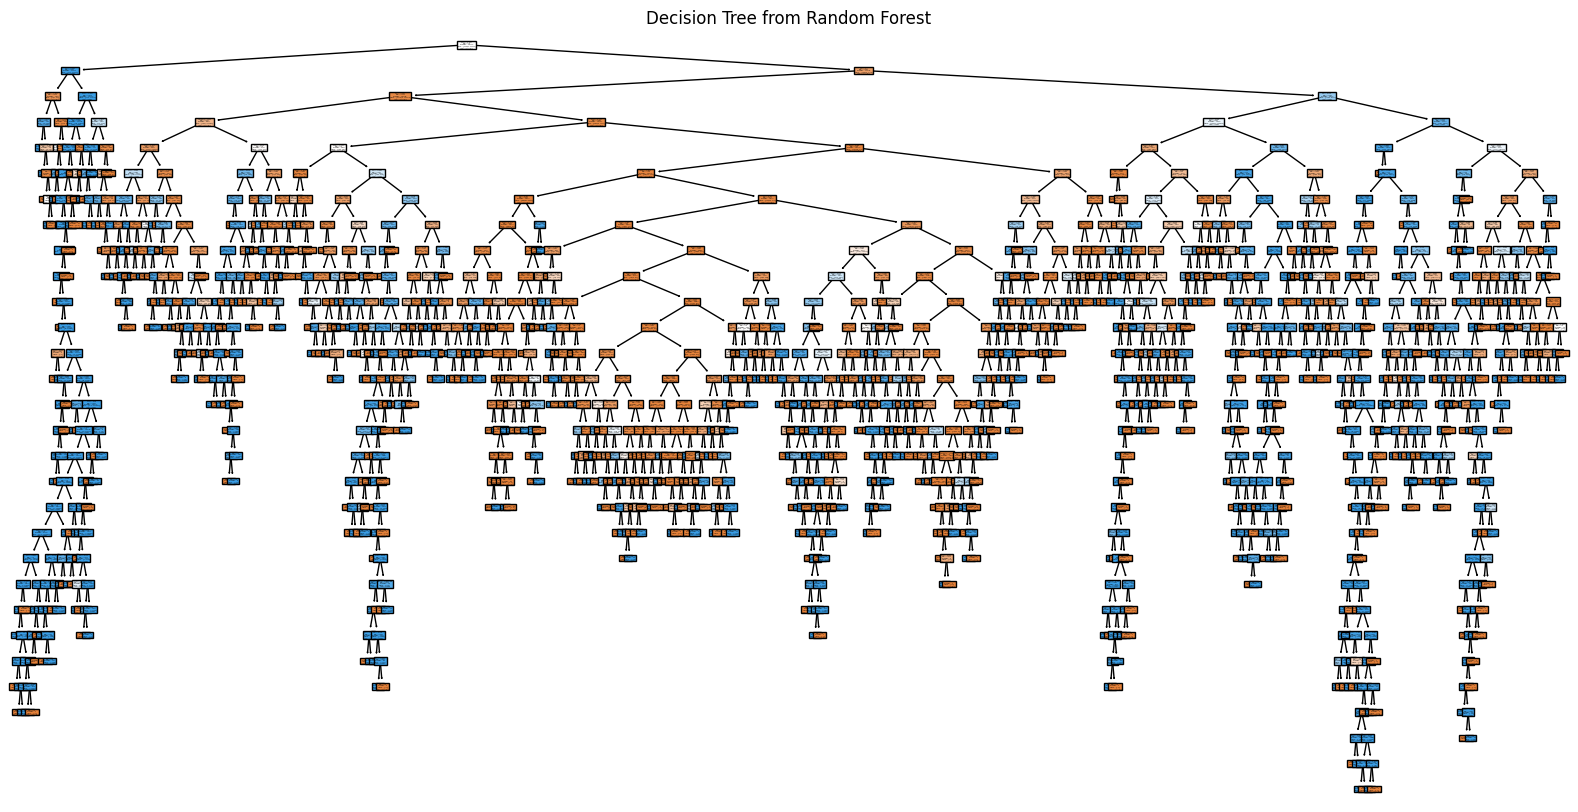

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select a single tree from the trained Random Forest model
single_tree = rf_model.estimators_[0]  # Get the first tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=X_train_resampled.columns, class_names=['Not Fraud', 'Fraud'])
plt.title("Decision Tree from Random Forest")
plt.show()


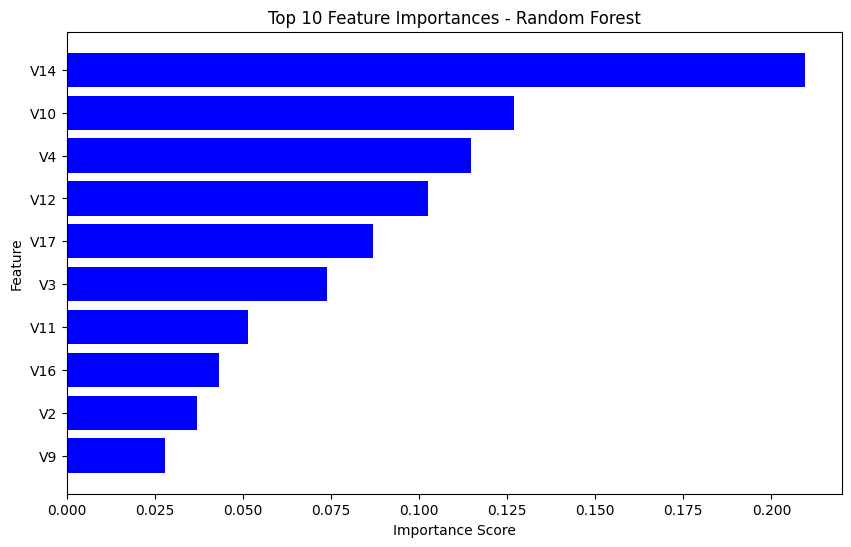

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importance
feature_importance = rf_model.feature_importances_

# Create DataFrame
feature_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'][:10], feature_df['Importance'][:10], color='blue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.show()